(rows,columns) = ( 1500 , 2000 )
image =  [[[172 173 167]
  [166 167 161]
  [159 160 152]
  ...
  [155 151 142]
  [169 165 156]
  [178 174 165]]

 [[156 157 152]
  [153 154 148]
  [150 151 143]
  ...
  [134 130 121]
  [143 139 130]
  [149 145 136]]

 [[130 130 128]
  [129 130 125]
  [129 130 124]
  ...
  [140 136 127]
  [145 141 132]
  [149 145 136]]

 ...

 [[111 113 102]
  [119 121 110]
  [100 102  91]
  ...
  [173 164 157]
  [167 158 151]
  [154 145 138]]

 [[112 114 103]
  [120 122 111]
  [ 99 101  90]
  ...
  [183 174 167]
  [180 171 164]
  [168 159 152]]

 [[113 115 104]
  [120 122 111]
  [ 98 100  89]
  ...
  [188 179 172]
  [187 178 171]
  [176 167 160]]]


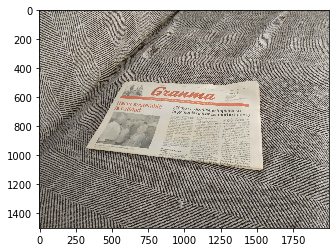

In [1]:
#Η επιλογή των γωνιών γίνεται με την εξής σειρά:
#Πάνω αριστερή γωνία, πάνω δεξιά γωνία,
#κάτω δεξιά γωνία και κάτω αριστερή γωνία 
import sys
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy.linalg import solve

#Σε αυτή την συνάρτηση διαλέγω με τον κέρσορα
#του ποντικιού τα 4 γωνίες της αρχικής εικόνας
def takeThePoints(img):
    points = []
    index = 1
    #Κάθε φορά που πατάω αριστερό κλικ προσθέτει στον πίνακα των 
    #σημείων τις συντενταγμένες της γωνίας
    def on_mouse(event, x, y, flags, param):
        nonlocal points
        nonlocal index
        if event == cv2.EVENT_LBUTTONDOWN:
            points.append(x)
            points.append(y)
            index += 1
    #Κάνω κανονικοποίηση του μγέθους της εικόνας και καλώ την on_mouse
    cv2.namedWindow('', cv2.WINDOW_NORMAL)
    cv2.setMouseCallback('', on_mouse)
    
    #Κρατάει το παράθυρο ανοιχτό μέχει να πατηθούν 4 κλικς
    while(index<=4):
        cv2.imshow('', img)
        cv2.waitKey(1)
    #Καταστρέφει τα ανοιχτό παράθυρο
    cv2.destroyAllWindows()

    return points 

#Σε αυτή την συνάρτηση επιλύω το συστήμα Αχ=b για να βρω
#τα α1,α2,...,α8 στοιχεία του πίνακα σχηματσμού
def calculatePoints(a1,a2,a3,a4,a5,a6,a7,a8):
    #Δημιουργώ το διάνυσμα b 
    b = np.zeros(8)
    b[0],b[1],b[2],b[3] = a1[0],a1[1],a2[0],a2[1]
    b[4],b[5],b[6],b[7] = a3[0],a3[1],a4[0],a4[1]
    
    #Δημιουργώ τον 8χ8 πίνακα Α
    A = np.zeros((8,8))
    A[0][0],A[0][1],A[0][2],A[0][3] = a5[0],a5[1],1,0
    A[0][4],A[0][5],A[0][6],A[0][7] = 0,0,-a5[0]*a1[0],-a5[1]*a1[0]
    A[1][0],A[1][1],A[1][2],A[1][3] = 0,0,0,a5[0]
    A[1][4],A[1][5],A[1][6],A[1][7] = a5[1],1,-a5[0]*a1[1],-a5[1]*a1[1]
    A[2][0],A[2][1],A[2][2],A[2][3] = a6[0],a6[1],1,0
    A[2][4],A[2][5],A[2][6],A[2][7] = 0,0,-a6[0]*a2[0],-a6[1]*a2[0] 
    A[3][0],A[3][1],A[3][2],A[3][3] = 0,0,0,a6[0]
    A[3][4],A[3][5],A[3][6],A[3][7] = a6[1],1,-a6[0]*a2[1],-a6[1]*a2[1]   
    A[4][0],A[4][1],A[4][2],A[4][3] = a7[0],a7[1],1,0
    A[4][4],A[4][5],A[4][6],A[4][7] = 0,0,-a7[0]*a3[0],-a7[1]*a3[0]   
    A[5][0],A[5][1],A[5][2],A[5][3] = 0,0,0,a7[0]
    A[5][4],A[5][5],A[5][6],A[5][7] = a7[1],1,-a7[0]*a3[1],-a7[1]*a3[1]   
    A[6][0],A[6][1],A[6][2],A[6][3] = a8[0],a8[1],1,0
    A[6][4],A[6][5],A[6][6],A[6][7] = 0,0,-a8[0]*a4[0],-a8[1]*a4[0]
    A[7][0],A[7][1],A[7][2],A[7][3] = 0,0,0,a8[0]
    A[7][4],A[7][5],A[7][6],A[7][7] = a8[1],1,-a8[0]*a4[1],-a8[1]*a4[1]
    
    #Υπολογισμός του αντίστροφου πίνακα Α
    invA = np.linalg.inv(A)
    
    #Επίλυση του συστήματος Αχ=b
    x = np.dot(invA,b)
    
    return x

#Άνοιγμα, αποθήκευση και εμφάνιση της αρχικής εικόνας   
image = 'newspaper.png'
f = np.array(Image.open(image))
rows,columns = f.shape[0],f.shape[1]
print("(rows,columns) = (",f.shape[0],',',f.shape[1],')')
print("image = ",f)
plt.imshow(f, cmap="gray")
plt.show()

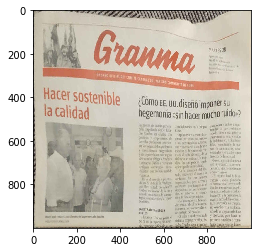

In [2]:
#Συνάρτηση για τις 4 γωνίες 
x = takeThePoints(f)

#Υπολογισμός των τεσσάρων γωνιών της αρχικής εικόνας
#και των τεσσάρων σημείων που πρέπει να καταλήξουν 
#στην τελική εικόνα
p1 = np.array([x[0],x[1]])
p2 = np.array([x[2],x[3]])
p3 = np.array([x[4],x[5]])
p4 = np.array([x[6],x[7]])
p5 = np.array([0,0])
p6 = np.array([999, 0])
p7 = np.array([999, 999])
p8 = np.array([0, 999])

#Επίλυση του συστήματος Αχ=b για την εύρεση του διανύσματος χ
p = np.zeros(8)
p = calculatePoints(p5,p6,p7,p8,p1,p2,p3,p4)

#Δημιουργία του πίνακα μετασχηματσμού
T = np.array([[p[0],p[1],p[2]],
              [p[3],p[4],p[5]],
              [p[6],p[7],1]])

#Εκτέλεση γεωμετρικού μετασχηματισμού
img=cv2.warpPerspective(f,T,(1000,1000)) 

#Εμφάνιση της και αποθήκευση της μετασχηματισμένης εικόνας
saveImage = 'newImage1.png'
plt.imshow(img,cmap="gray")
plt.show()
Image.fromarray(img.astype(np.uint8)).save(saveImage)

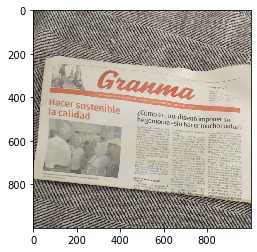

In [3]:
#Συνάρτηση για τις 4 γωνίες 
x = takeThePoints(f)

#Υπολογισμός των τεσσάρων γωνιών της αρχικής εικόνας
#και των τεσσάρων σημείων που πρέπει να καταλήξουν 
#στην τελική εικόνα
p1 = np.array([x[0],x[1]])
p2 = np.array([x[2],x[3]])
p3 = np.array([x[4],x[5]])
p4 = np.array([x[6],x[7]])
p5 = np.array([0,0])
p6 = np.array([999, 0])
p7 = np.array([999, 999])
p8 = np.array([0, 999])

#Επίλυση του συστήματος Αχ=b για την εύρεση του διανύσματος χ
p = np.zeros(8)
p = calculatePoints(p5,p6,p7,p8,p1,p2,p3,p4)

#Δημιουργία του πίνακα μετασχηματσμού
T = np.array([[p[0],p[1],p[2]],
              [p[3],p[4],p[5]],
              [p[6],p[7],1]])

#Εκτέλεση γεωμετρικού μετασχηματισμού
img=cv2.warpPerspective(f,T,(1000,1000)) 

#Εμφάνιση της και αποθήκευση της μετασχηματισμένης εικόνας
saveImage = 'newImage2.png'
plt.imshow(img,cmap="gray")
plt.show()
Image.fromarray(img.astype(np.uint8)).save(saveImage)

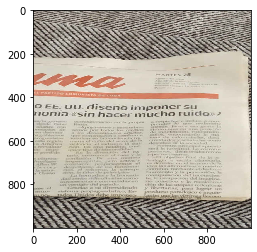

In [4]:
#Συνάρτηση για τις 4 γωνίες 
x = takeThePoints(f)

#Υπολογισμός των τεσσάρων γωνιών της αρχικής εικόνας
#και των τεσσάρων σημείων που πρέπει να καταλήξουν 
#στην τελική εικόνα
p1 = np.array([x[0],x[1]])
p2 = np.array([x[2],x[3]])
p3 = np.array([x[4],x[5]])
p4 = np.array([x[6],x[7]])
p5 = np.array([0,0])
p6 = np.array([999, 0])
p7 = np.array([999, 999])
p8 = np.array([0, 999])

#Επίλυση του συστήματος Αχ=b για την εύρεση του διανύσματος χ
p = np.zeros(8)
p = calculatePoints(p5,p6,p7,p8,p1,p2,p3,p4)

#Δημιουργία του πίνακα μετασχηματσμού
T = np.array([[p[0],p[1],p[2]],
              [p[3],p[4],p[5]],
              [p[6],p[7],1]])

#Εκτέλεση γεωμετρικού μετασχηματισμού
img=cv2.warpPerspective(f,T,(1000,1000)) 

#Εμφάνιση της και αποθήκευση της μετασχηματισμένης εικόνας
saveImage = 'newImage3.png'
plt.imshow(img,cmap="gray")
plt.show()
Image.fromarray(img.astype(np.uint8)).save(saveImage)